In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simsopt.mhd import Vmec, QuasisymmetryRatioResidual, VirtualCasing, Boozer
from simsopt.mhd.bootstrap import RedlGeomBoozer, VmecRedlBootstrapMismatch, RedlGeomVmec, j_dot_B_Redl
from simsopt.mhd.profiles import ProfilePolynomial, ProfilePressure, ProfileScaled, ProfileSpline
vmec_input = "/Users/rogeriojorge/local/single_stage_optimization_finite_beta/optimization_finitebeta_nfp2_QI_stage1/input.final"

In [2]:
vmec=Vmec(vmec_input, verbose=False)
vmec.run()

In [3]:
helicity_n = -1
helicity_m = 0
qs = QuasisymmetryRatioResidual(vmec, [0.1,0.3,0.5,0.7,0.9], helicity_n=helicity_n, helicity_m=helicity_m)
qs.total()

0.047519765480052205

In [4]:
beta = 2.5
ne0 = 3e20 * (beta/100/0.05)**(1/3)
Te0 = 15e3 * (beta/100/0.05)**(2/3)
ne = ProfilePolynomial(ne0 * np.array([1, 0, 0, 0, 0, -0.99]))
Te = ProfilePolynomial(Te0 * np.array([1, -0.99]))
Zeff = 1.0
ni = ne
Ti = Te
redl_s = np.linspace(0, 1, 22)
redl_geom = RedlGeomVmec(vmec, redl_s[1:-1])
jdotB_Redl, _ = j_dot_B_Redl(ne,Te,Ti,Zeff,helicity_n=helicity_n,helicity_m=helicity_m,geom=redl_geom)

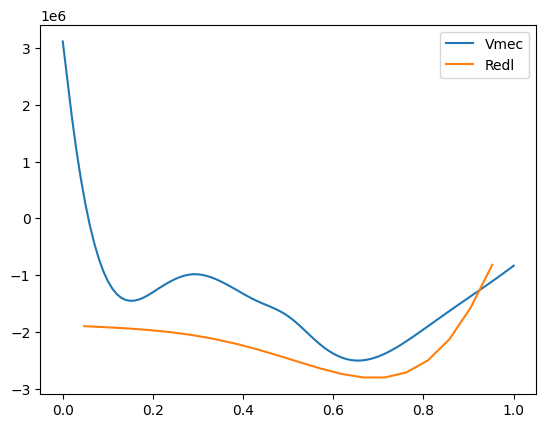

In [5]:
jdotb_vmec = vmec.wout.jdotb
plt.plot(vmec.s_full_grid, jdotb_vmec, label='Vmec')
plt.plot(redl_geom.surfaces, jdotB_Redl, label='Redl')
plt.legend()